In [27]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import pylab

### df_data analyse

In [52]:
df_data = pd.read_csv("data.csv")
print(df_data.shape)
df_data.head(5)

(45136, 16)


,DATE,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION
0,2008-05-05,58,Manager,Marié,Tertiaire,No,2143,Yes,No,NaN,261,1,-1,0,NaN,No
1,2008-05-05,123,Technicien,NaN,Secondaire,No,29,Yes,NaN,NaN,151,1,-1,0,NaN,No
2,2008-05-05,33,Entrepreuneur,Marié,Secondaire,No,2,Yes,Yes,NaN,76,1,-1,0,NaN,No
3,2008-05-05,47,Col bleu,Marié,NaN,No,1506,Yes,No,NaN,92,1,-1,0,NaN,No
4,2008-05-05,33,NaN,Célibataire,NaN,No,1,No,No,NaN,198,1,-1,0,NaN,No


In [79]:
#df = df_data.query('NB_DAY_LAST_CONTACT >= 0')
df = df_data
no = df[df["SUBSCRIPTION"]=="No"]
yes = df[df["SUBSCRIPTION"]=="Yes"]

yes.head()

,DATE,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION
83,2008-05-05,59,Admin,Marié,Secondaire,No,2343,Yes,No,NaN,1042,1,-1,0,NaN,Yes
86,2008-05-05,56,Admin,Marié,Secondaire,No,45,No,No,NaN,1467,1,-1,0,NaN,Yes
87,2008-05-05,41,Technicien,Marié,Secondaire,No,1270,Yes,No,NaN,1389,1,-1,0,NaN,Yes
129,2008-05-05,55,Services,Marié,Secondaire,No,2476,Yes,No,NaN,579,1,-1,0,NaN,Yes
168,2008-05-05,54,Admin,Marié,Tertiaire,No,184,No,No,NaN,673,2,-1,0,NaN,Yes


In [83]:
col = "NB_CONTACT_LAST_CAMPAIGN"
bins = 10

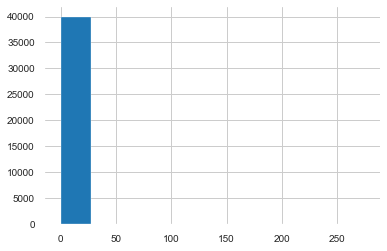

In [84]:
no[col].hist(bins=bins)

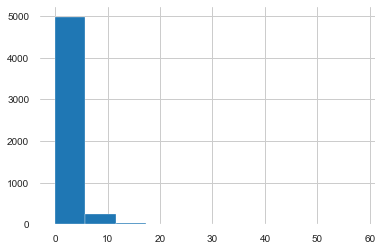

In [85]:
yes[col].hist(bins=bins)

In [36]:
df = df_data[df_data["RESULT_LAST_CAMPAIGN"].isnull()]
print(df.shape)
x = pd.crosstab(df["CONTACT"],df["NB_DAY_LAST_CONTACT"]).apply(lambda r: round(r/r.sum()*100,2), axis=1)
print(x)

(36939, 16)
NB_DAY_LAST_CONTACT    -1     98    168   188   416   528
CONTACT                                                  
Fixe                 100.00   0.0   0.0   0.0   0.0   0.0
Portable              99.98   0.0   0.0   0.0   0.0   0.0


In [3]:
profile = ProfileReport(df_data, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_widgets()

In [4]:
quanti = df_data.dtypes.index[df_data.dtypes == 'int64']
quali = df_data.dtypes.index[df_data.dtypes == 'object']

In [5]:
def stats_subscription(target_categorie, nom_data, arrondi):
    x = pd.crosstab(nom_data[target_categorie],nom_data["SUBSCRIPTION"])
    print(x)
    
    print("Pour la variable: {}".format(target_categorie))
    print("\n")
    print('Part de YES total: {}'.format(round(x["No"].sum() / (x["Yes"].sum() + x["No"].sum())*100,arrondi)))
    print('Part de NO total: {}'.format(round(x["Yes"].sum() / (x["Yes"].sum() + x["No"].sum())*100,arrondi)))
    print("\n")
    
    i = 0
    for j in x.index: 
        print('Pour la catégorie: {}'.format(j))
        print('Part de NO: {}'.format(round(x["No"][i] / (x["No"][i] + x["Yes"][i])*100,arrondi)))
        print('Part de YES: {}'.format(round(x["Yes"][i] / (x["No"][i] + x["Yes"][i])*100,arrondi)))
        print('\n')
        i = i + 1

In [6]:
quanti

Index(['AGE', 'BALANCE', 'DURATION_CONTACT', 'NB_CONTACT',
       'NB_DAY_LAST_CONTACT', 'NB_CONTACT_LAST_CAMPAIGN'],
      dtype='object')

In [8]:
stats_subscription('JOB_TYPE',df_data,3)

SUBSCRIPTION         No   Yes
JOB_TYPE                     
Admin              4534   627
Chomeur            1100   201
Col bleu           9021   705
Employé de ménage  1130   109
Entrepreuneur      1363   120
Etudiant            666   266
Indépendant        1391   186
Manager            8150  1295
Retraité           1742   510
Services           3781   367
Technicien         6753   833
Pour la variable: JOB_TYPE


Part de YES total: 88.363
Part de NO total: 11.637


Pour la catégorie: Admin
Part de NO: 87.851
Part de YES: 12.149


Pour la catégorie: Chomeur
Part de NO: 84.55
Part de YES: 15.45


Pour la catégorie: Col bleu
Part de NO: 92.751
Part de YES: 7.249


Pour la catégorie: Employé de ménage
Part de NO: 91.203
Part de YES: 8.797


Pour la catégorie: Entrepreuneur
Part de NO: 91.908
Part de YES: 8.092


Pour la catégorie: Etudiant
Part de NO: 71.459
Part de YES: 28.541


Pour la catégorie: Indépendant
Part de NO: 88.205
Part de YES: 11.795


Pour la catégorie: Manager
Part de NO

In [ ]:
def stats_subscription(categorie1, categorie2, nom_data, arrondi):
    x = pd.crosstab(nom_data[categorie1],nom_data[categorie2])
    print(x)
    
    print("Pour la variable: {}".format(target_categorie))
    print("\n")
    print('Part de YES total: {}'.format(round(x["No"].sum() / (x["Yes"].sum() + x["No"].sum())*100,arrondi)))
    print('Part de NO total: {}'.format(round(x["Yes"].sum() / (x["Yes"].sum() + x["No"].sum())*100,arrondi)))
    print("\n")
    
    i = 0
    for j in x.index: 
        print('Pour la catégorie: {}'.format(j))
        print('Part de NO: {}'.format(round(x["No"][i] / (x["No"][i] + x["Yes"][i])*100,arrondi)))
        print('Part de YES: {}'.format(round(x["Yes"][i] / (x["No"][i] + x["Yes"][i])*100,arrondi)))
        print('\n')
        i = i + 1

In [168]:
quali

Index(['DATE', 'JOB_TYPE', 'STATUS', 'EDUCATION', 'HAS_DEFAULT',
       'HAS_HOUSING_LOAN', 'HAS_PERSO_LOAN', 'CONTACT', 'RESULT_LAST_CAMPAIGN',
       'SUBSCRIPTION'],
      dtype='object')

In [172]:
categorie1 = 'STATUS'
categorie2 = 'JOB_TYPE'
nom_data = df_data
x = pd.crosstab(nom_data[categorie1],nom_data[categorie2])
x
for i in nom_data[categorie2]:

JOB_TYPE,Admin,Chomeur,Col bleu,Employé de ménage,Entrepreuneur,Etudiant,Indépendant,Manager,Retraité,Services,Technicien
STATUS,,,,,,,,,,,
Célibataire,1686,390,1973,141,234,846,436,2869,106,1172,2543
Divorcé,727,166,728,177,177,6,138,1079,408,530,894
Marié,2623,716,6819,890,1045,53,970,5233,1678,2340,3938


[]

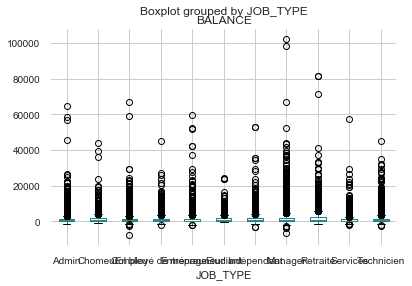

In [177]:
df_data.boxplot(column='BALANCE', by='JOB_TYPE').plot()

In [166]:
def stats_quali_quanti(nom_variable_quali,nom_variable_quanti, nom_data):

    %matplotlib inline
    boxlist = []
    for i in list(nom_data[nom_variable_quanti].unique()):
        boxlist.append(nom_data[nom_data[nom_variable_quanti] == i][nom_variable_quali])
    BoxName = list(nom_data[nom_variable_quanti].unique())
    idx = range(len(BoxName))
    data = boxlist
    plt.figure(figsize=(10,10), dpi=80)

    plt.boxplot(data)
    plt.xticks(idx, BoxName, rotation='vertical')

    plt.title('Différence entre les modalités de la variable {} par rapport à la distribution de {}'.format(nom_variable_quanti,nom_variable_quali))

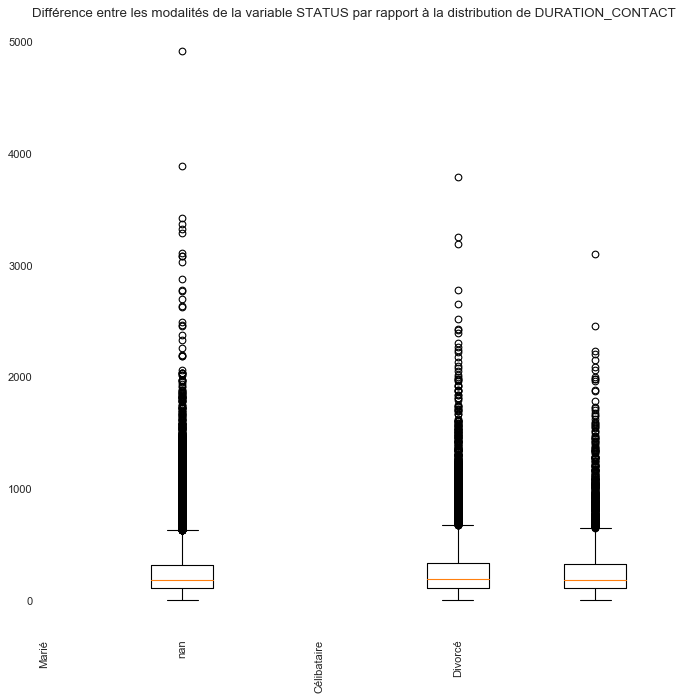

In [167]:
stats_quali_quanti('DURATION_CONTACT','STATUS',df_data)

In [91]:
quanti

Index(['AGE', 'BALANCE', 'DURATION_CONTACT', 'NB_CONTACT',
       'NB_DAY_LAST_CONTACT', 'NB_CONTACT_LAST_CAMPAIGN'],
      dtype='object')

In [133]:
quali

Index(['DATE', 'JOB_TYPE', 'STATUS', 'EDUCATION', 'HAS_DEFAULT',
       'HAS_HOUSING_LOAN', 'HAS_PERSO_LOAN', 'CONTACT', 'RESULT_LAST_CAMPAIGN',
       'SUBSCRIPTION'],
      dtype='object')

In [125]:
df_data[list(quanti)].corr

,AGE,BALANCE,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN
AGE,1.000000,0.050835,-0.004716,0.001231,-0.018904,0.001475
BALANCE,0.050835,1.000000,0.021517,-0.014605,0.003466,0.016515
DURATION_CONTACT,-0.004716,0.021517,1.000000,-0.084752,-0.001896,0.000483
NB_CONTACT,0.001231,-0.014605,-0.084752,1.000000,-0.088337,-0.032310
NB_DAY_LAST_CONTACT,-0.018904,0.003466,-0.001896,-0.088337,1.000000,0.454566
NB_CONTACT_LAST_CAMPAIGN,0.001475,0.016515,0.000483,-0.032310,0.454566,1.000000


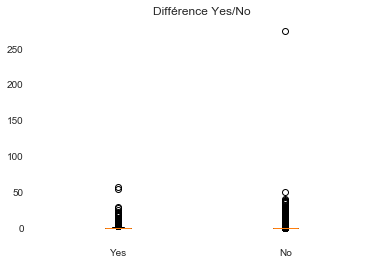

In [122]:
stats_subscription_quanti("NB_CONTACT_LAST_CAMPAIGN",df_data)

In [39]:
# Nom de la data à remplacer
df_data = df_data
perc = []
for i in range(df_data.shape[1]):
    Nom = df_data.columns[i]
    Distinct = df_data.iloc[:,i].nunique()
    print("Nom: {}\nNombre de valeurs distinctes: {}".format(Nom, Distinct))
    Nb = df_data.iloc[:,i].isnull().sum()
    Poucentage = df_data.iloc[:,i].isnull().sum() / df_data.shape[0]
    Nom = df_data.columns[i]
    print("Nombre NaN: {}\nPourcentage: {}\n".format(Nb,round(Poucentage,4)))

Nom: DATE
Nombre de valeurs distinctes: 552
Nombre NaN: 0
Pourcentage: 0.0

Nom: AGE
Nombre de valeurs distinctes: 78
Nombre NaN: 0
Pourcentage: 0.0

Nom: JOB_TYPE
Nombre de valeurs distinctes: 11
Nombre NaN: 286
Pourcentage: 0.0063

Nom: STATUS
Nombre de valeurs distinctes: 3
Nombre NaN: 1128
Pourcentage: 0.025

Nom: EDUCATION
Nombre de valeurs distinctes: 3
Nombre NaN: 1853
Pourcentage: 0.0411

Nom: HAS_DEFAULT
Nombre de valeurs distinctes: 2
Nombre NaN: 0
Pourcentage: 0.0

Nom: BALANCE
Nombre de valeurs distinctes: 7168
Nombre NaN: 0
Pourcentage: 0.0

Nom: HAS_HOUSING_LOAN
Nombre de valeurs distinctes: 2
Nombre NaN: 0
Pourcentage: 0.0

Nom: HAS_PERSO_LOAN
Nombre de valeurs distinctes: 2
Nombre NaN: 1354
Pourcentage: 0.03

Nom: CONTACT
Nombre de valeurs distinctes: 2
Nombre NaN: 13019
Pourcentage: 0.2884

Nom: DURATION_CONTACT
Nombre de valeurs distinctes: 1572
Nombre NaN: 0
Pourcentage: 0.0

Nom: NB_CONTACT
Nombre de valeurs distinctes: 48
Nombre NaN: 0
Pourcentage: 0.0

Nom: NB_DAY

In [25]:
for i in range(df_data.shape[1]):
    Nom = df_data.columns[i]
    Distinct = df_data.iloc[:,i].nunique()
    print("Nom: {}\nNombre de valeurs distinctes: {}\n".format(Nom, Distinct))

Nom: DATE
Nombre de valeurs distinctes: 552


Nom: AGE
Nombre de valeurs distinctes: 78


Nom: JOB_TYPE
Nombre de valeurs distinctes: 11


Nom: STATUS
Nombre de valeurs distinctes: 3


Nom: EDUCATION
Nombre de valeurs distinctes: 3


Nom: HAS_DEFAULT
Nombre de valeurs distinctes: 2


Nom: BALANCE
Nombre de valeurs distinctes: 7168


Nom: HAS_HOUSING_LOAN
Nombre de valeurs distinctes: 2


Nom: HAS_PERSO_LOAN
Nombre de valeurs distinctes: 2


Nom: CONTACT
Nombre de valeurs distinctes: 2


Nom: DURATION_CONTACT
Nombre de valeurs distinctes: 1572


Nom: NB_CONTACT
Nombre de valeurs distinctes: 48


Nom: NB_DAY_LAST_CONTACT
Nombre de valeurs distinctes: 555


Nom: NB_CONTACT_LAST_CAMPAIGN
Nombre de valeurs distinctes: 41


Nom: RESULT_LAST_CAMPAIGN
Nombre de valeurs distinctes: 3


Nom: SUBSCRIPTION
Nombre de valeurs distinctes: 2




### df_eco analyse

In [31]:
df_eco = pd.read_csv("socio_eco.csv")
print(df_eco.shape)
df_eco.head(30)

(30, 5)


,DATE,EMPLOYMENT_VARIATION_RATE,IDX_CONSUMER_PRICE,IDX_CONSUMER_CONFIDENCE,NB_EMPLOYE
0,2008-05-31,1.1,93.994,-36.4,5191.0
1,2008-06-30,1.4,94.465,-41.8,5228.1
2,2008-07-31,1.4,93.918,-42.7,5228.1
3,2008-08-31,1.4,93.444,-36.1,5228.1
4,2008-09-30,NaN,NaN,NaN,NaN
5,2008-10-31,-0.1,93.798,-40.4,5195.8
6,2008-11-30,-0.1,93.200,-42.0,5195.8
7,2008-12-31,-0.2,92.756,-45.9,5176.3
8,2009-01-31,NaN,NaN,NaN,NaN
9,2009-02-28,NaN,NaN,NaN,NaN


In [ ]:
profile = ProfileReport(df_data, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_widgets()

In [26]:
df_eco.dtypes

DATE                          object
EMPLOYMENT_VARIATION_RATE    float64
IDX_CONSUMER_PRICE           float64
IDX_CONSUMER_CONFIDENCE      float64
NB_EMPLOYE                   float64
dtype: object

In [27]:
# Nom de la data à remplacer
df_data = df_eco
perc = []
for i in range(df_data.shape[1]):
    Nb = df_data.iloc[:,i].isnull().sum()
    Poucentage = df_data.iloc[:,i].isnull().sum() / df_data.shape[0]
    Nom = df_data.columns[i]
    print("Nombre NaN: {}\nPourcentage: {}\nNom de la variable: {}\n".format(Nb,round(Poucentage,4),Nom))

Nombre NaN: 0
Pourcentage: 0.0
Nom de la variable: DATE


Nombre NaN: 5
Pourcentage: 0.1667
Nom de la variable: EMPLOYMENT_VARIATION_RATE


Nombre NaN: 5
Pourcentage: 0.1667
Nom de la variable: IDX_CONSUMER_PRICE


Nombre NaN: 5
Pourcentage: 0.1667
Nom de la variable: IDX_CONSUMER_CONFIDENCE


Nombre NaN: 5
Pourcentage: 0.1667
Nom de la variable: NB_EMPLOYE




In [28]:
for i in range(df_data.shape[1]):
    Nom = df_data.columns[i]
    Distinct = df_data.iloc[:,i].nunique()
    print("Nom: {}\nNombre de valeurs distinctes: {}\n".format(Nom, Distinct))

Nom: DATE
Nombre de valeurs distinctes: 30


Nom: EMPLOYMENT_VARIATION_RATE
Nombre de valeurs distinctes: 10


Nom: IDX_CONSUMER_PRICE
Nombre de valeurs distinctes: 25


Nom: IDX_CONSUMER_CONFIDENCE
Nombre de valeurs distinctes: 25


Nom: NB_EMPLOYE
Nombre de valeurs distinctes: 11


